In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
!pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
surya = pd.read_csv('book.csv')
surya

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
surya.shape

(2000, 11)

In [ ]:
surya.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
surya.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
surya.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [ ]:
surya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [ ]:
surya.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
surya

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# 10% supprt & 70% confidence
surya_freq_items = apriori(surya,min_support=0.10)
surya_freq_items

,support,itemsets
0,0.4230,(0)
1,0.2475,(1)
2,0.4310,(2)
3,0.2820,(3)
4,0.2145,(4)
5,0.2410,(5)
6,0.2760,(6)
7,0.1135,(7)
8,0.1085,(10)
9,0.1650,"(0, 1)"


In [ ]:
deva = association_rules(surya_freq_items,metric='lift',min_threshold=0.65)
deva

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(1),(0),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(0),(2),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(2),(0),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(0),(3),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(2, 6)",(5),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(5, 6)",(2),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(2),"(5, 6)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(5),"(2, 6)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [ ]:
deva.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(2),(7),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(7),(2),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(0, 5)",(6),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(6),"(0, 5)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(5),"(2, 3)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966


In [ ]:
deva[deva.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(1),(0),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(0),(2),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(2),(0),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(0),(3),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(2, 6)",(5),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(5, 6)",(2),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(2),"(5, 6)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(5),"(2, 6)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


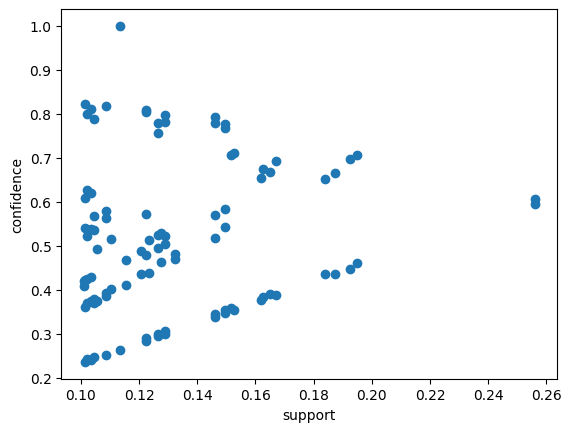

In [ ]:
plt.scatter(deva['support'],deva['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [ ]:
#support = 18% & confidence = 85%
surya_freq_items2 = apriori(surya,min_support=0.18)
surya_freq_items2

,support,itemsets
0,0.4230,(0)
1,0.2475,(1)
2,0.4310,(2)
3,0.2820,(3)
4,0.2145,(4)
5,0.2410,(5)
6,0.2760,(6)
7,0.2560,"(0, 2)"
8,0.1840,"(0, 3)"
9,0.1950,"(0, 6)"


In [ ]:
deva_rules2 = association_rules(surya_freq_items2,metric='lift',min_threshold=0.85)
deva_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(2),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
1,(2),(0),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(0),(3),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
3,(3),(0),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(0),(6),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
5,(6),(0),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
6,(2),(3),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875,0.618236
7,(3),(2),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
8,(2),(6),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
9,(6),(2),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689


In [ ]:
deva_rules2[deva_rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(2),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
1,(2),(0),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(0),(3),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
3,(3),(0),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(0),(6),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
5,(6),(0),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
6,(2),(3),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875,0.618236
7,(3),(2),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
8,(2),(6),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
9,(6),(2),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689


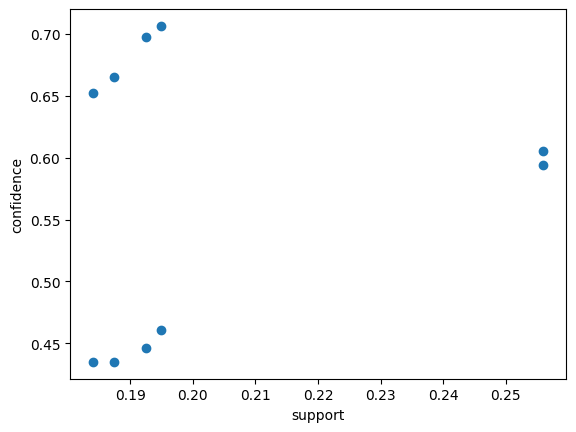

In [ ]:
plt.scatter(deva_rules2['support'],deva_rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [ ]:
# support = 26% & Confidence =95%
surya_freq_items3 = apriori(surya,min_support=0.25)
surya_freq_items3

,support,itemsets
0,0.423,(0)
1,0.431,(2)
2,0.282,(3)
3,0.276,(6)
4,0.256,"(0, 2)"


In [ ]:
deva_rules3 = association_rules(surya_freq_items3,metric = 'lift',min_threshold=0.95)
deva_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(2),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(2),(0),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [ ]:
deva_rules3[deva_rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(2),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(2),(0),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


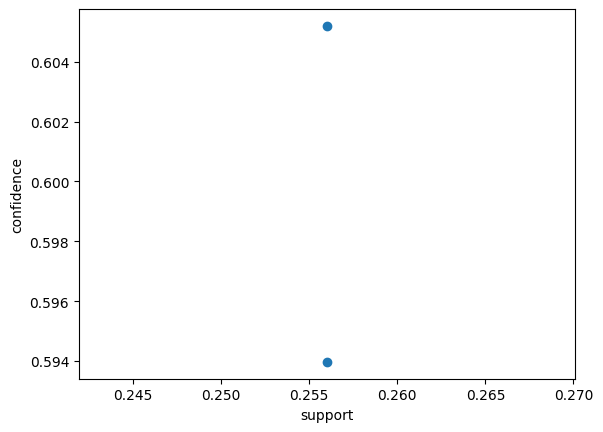

In [ ]:
plt.scatter(deva_rules3['support'],deva_rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()